# #### Importing all libraries

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings            
warnings.filterwarnings("ignore")

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings            
warnings.filterwarnings("ignore")

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Preprocessing 

#### Functions to fetch Raw Data

In [32]:
def get_acc_data(folder_path):
    '''
    ACC.csv
    Data from 3-axis accelerometer sensor. 
    The accelerometer is configured to measure acceleration in the range [-2g, 2g]. 
    Therefore the unit in this file is 1/64g.
    Data from x, y, and z axis are respectively in first, second, and third column.
    
    The first row is the initial time of the session expressed as unix timestamp in UTC.
    The second row is the sample rate expressed in Hz.
    '''
    
    filename = os.path.join(folder_path, 'ACC.csv')


    # Load the CSV file into a DataFrame
    df = pd.read_csv(filename, header=None)

    # Get the first two rows of the DataFrame
    index_values = df.iloc[:2,:].values
    # Convert the first row to a datetime index
    index = pd.to_datetime(index_values[0], unit='s')

    # Get the sample rate from the second row
    sample_rate = index_values[1,0]

    data = df.iloc[2:,:]

    # Convert data to float type
    data = data.astype(float)

    # Create DatetimeIndex
    time_index = pd.date_range(start=index[0], periods=len(data), freq=f'{sample_rate:.0f}S')

    # Set DatetimeIndex as index of DataFrame
    data.index = time_index

    # Convert from units of 1/64g to units of g
    data = data / 64.0
    data.columns = [['acc_x', 'acc_y', 'acc_z']]

    return data

get_acc_data("/content/drive/MyDrive/Greeshma/Stress-Predict-Dataset-main/Raw_data/S01")

,acc_x,acc_y,acc_z
2022-02-07 09:27:41,-0.031250,0.671875,0.671875
2022-02-07 09:28:13,-0.031250,0.687500,0.718750
2022-02-07 09:28:45,0.031250,0.687500,0.734375
2022-02-07 09:29:17,0.046875,0.671875,0.687500
2022-02-07 09:29:49,0.015625,0.671875,0.703125
...,...,...,...
2022-03-18 00:37:01,0.546875,0.031250,0.765625
2022-03-18 00:37:33,0.531250,0.046875,0.781250
2022-03-18 00:38:05,0.546875,0.031250,0.796875
2022-03-18 00:38:37,0.515625,0.078125,0.781250


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
def get_bvp_data(folder_path):
    '''
    BVP.csv
    Data from photoplethysmograph.
    
    The first row is the initial time of the session expressed as unix timestamp in UTC.
    The second row is the sample rate expressed in Hz.
    '''
    
    filename = os.path.join(folder_path, 'BVP.csv')


    # Load the CSV file into a DataFrame
    df = pd.read_csv(filename, header=None)

    # Get the first two rows of the DataFrame
    index_values = df.iloc[:2,:].values
    # Convert the first row to a datetime index
    index = pd.to_datetime(index_values[0], unit='s')

    # Get the sample rate from the second row
    sample_rate = index_values[1,0]

    data = df.iloc[2:,:]

    # Convert data to float type
    data = data.astype(float)

    # Create DatetimeIndex
    time_index = pd.date_range(start=index[0], periods=len(data), freq=f'{sample_rate:.0f}S')

    # Set DatetimeIndex as index of DataFrame
    data.index = time_index
    data.columns = ['bvp']
    return data

get_bvp_data("/content/drive/MyDrive/Greeshma/Stress-Predict-Dataset-main/Raw_data/S01")

,bvp
2022-02-07 09:27:41,0.00
2022-02-07 09:28:45,0.00
2022-02-07 09:29:49,0.00
2022-02-07 09:30:53,0.00
2022-02-07 09:31:57,0.00
...,...
2022-07-11 23:38:53,-56.27
2022-07-11 23:39:57,-57.94
2022-07-11 23:41:01,-57.37
2022-07-11 23:42:05,-55.22


In [35]:
def get_eda_data(folder_path):
    '''
    EDA.csv
    Data from the electrodermal activity sensor expressed as microsiemens (μS).
    
    The first row is the initial time of the session expressed as unix timestamp in UTC.
    The second row is the sample rate expressed in Hz.
    '''
    
    filename = os.path.join(folder_path, 'EDA.csv')


    # Load the CSV file into a DataFrame
    df = pd.read_csv(filename, header=None)

    # Get the first two rows of the DataFrame
    index_values = df.iloc[:2,:].values
    # Convert the first row to a datetime index
    index = pd.to_datetime(index_values[0], unit='s')

    # Get the sample rate from the second row
    sample_rate = index_values[1,0]

    data = df.iloc[2:,:]

    # Convert data to float type
    data = data.astype(float)

    # Create DatetimeIndex
    time_index = pd.date_range(start=index[0], periods=len(data), freq=f'{sample_rate:.0f}S')

    # Set DatetimeIndex as index of DataFrame
    data.index = time_index

    data.columns = ['eda']

    return data

# get_eda_data("/content/drive/MyDrive/Greeshma/Stress-Predict-Dataset-main/Raw_data/S01")

In [36]:
def get_hr_data(folder_path):
    '''
    HR.csv
    Average heart rate extracted from the BVP signal.The first row is the initial time of the session expressed as unix timestamp in UTC.
    The second row is the sample rate expressed in Hz.
    
    The first row is the initial time of the session expressed as unix timestamp in UTC.
    The second row is the sample rate expressed in Hz.
    '''
    
    filename = os.path.join(folder_path, 'HR.csv')


    # Load the CSV file into a DataFrame
    df = pd.read_csv(filename, header=None)

    # Get the first two rows of the DataFrame
    index_values = df.iloc[:2,:].values
    # Convert the first row to a datetime index
    index = pd.to_datetime(index_values[0], unit='s')

    # Get the sample rate from the second row
    sample_rate = index_values[1,0]

    data = df.iloc[2:,:]

    # Convert data to float type
    data = data.astype(float)

    # Create DatetimeIndex
    time_index = pd.date_range(start=index[0], periods=len(data), freq=f'{sample_rate:.0f}S')

    # Set DatetimeIndex as index of DataFrame
    data.index = time_index

    data.columns = ['hr']

    return data

get_hr_data("/content/drive/MyDrive/Greeshma/Stress-Predict-Dataset-main/Raw_data/S01")

,hr
2022-02-07 09:27:51,83.00
2022-02-07 09:27:52,83.00
2022-02-07 09:27:53,72.67
2022-02-07 09:27:54,87.00
2022-02-07 09:27:55,80.00
...,...
2022-02-07 10:21:56,83.35
2022-02-07 10:21:57,83.33
2022-02-07 10:21:58,83.28
2022-02-07 10:21:59,83.22


In [37]:
def get_ibi_data(folder_path):
    '''
    IBI.csv
    Time between individuals heart beats extracted from the BVP signal.
    No sample rate is needed for this file.
    The first column is the time (respect to the initial time) of the detected inter-beat interval expressed in seconds (s).
    The second column is the duration in seconds (s) of the detected inter-beat interval (i.e., the distance in seconds from the previous beat).
    '''
    
    filename = os.path.join(folder_path, 'IBI.csv')

    # create a DataFrame from the data
    df = pd.read_csv(filename, header=None, names=['time', 'ibi'])

    index_values = df.iloc[:1,:].values

    # print(index_values)

    index = pd.to_datetime(index_values[0][0], unit='s')

    data = df.iloc[1:,:]

    # convert the time column to a datetime index -- need to floor to elliminate the millisecs
    data.index = pd.to_datetime(data['time'], unit='s', origin=index).dt.floor('s')

    # drop the original time column
    data.drop('time', axis=1, inplace=True)

    # data.columns = ['ibis']

    return data

get_ibi_data("/content/drive/MyDrive/Greeshma/Stress-Predict-Dataset-main/Raw_data/S01")

,ibi
time,
2022-02-07 09:28:16,0.890625
2022-02-07 09:28:17,0.859375
2022-02-07 09:28:18,0.953125
2022-02-07 09:28:19,0.890625
2022-02-07 09:28:20,0.859375
...,...
2022-02-07 10:15:05,0.656250
2022-02-07 10:15:05,0.734375
2022-02-07 10:15:06,0.671875


In [38]:
def get_temp_data(folder_path):
    '''
    TEMP.csv
    Data from temperature sensor expressed degrees on the Celsius (°C) scale.
    
    The first column is the time (respect to the initial time) of the detected inter-beat interval expressed in seconds (s).
    The second column is the duration in seconds (s) of the detected inter-beat interval (i.e., the distance in seconds from the previous beat).
    '''
    
    filename = os.path.join(folder_path, 'TEMP.csv')

    # Load the CSV file into a DataFrame
    df = pd.read_csv(filename, header=None)

    # Get the first two rows of the DataFrame
    index_values = df.iloc[:2,:].values
    # Convert the first row to a datetime index
    index = pd.to_datetime(index_values[0], unit='s')

    # Get the sample rate from the second row
    sample_rate = index_values[1,0]

    data = df.iloc[2:,:]

    # Convert data to float type
    data = data.astype(float)

    # Create DatetimeIndex
    time_index = pd.date_range(start=index[0], periods=len(data), freq=f'{sample_rate:.0f}S')

    # Set DatetimeIndex as index of DataFrame
    data.index = time_index

    data.columns = ['temp']

    return data

get_temp_data("/content/drive/MyDrive/Greeshma/Stress-Predict-Dataset-main/Raw_data/S01")

,temp
2022-02-07 09:27:41,28.39
2022-02-07 09:27:45,28.39
2022-02-07 09:27:49,28.39
2022-02-07 09:27:53,28.39
2022-02-07 09:27:57,28.39
...,...
2022-02-07 23:57:45,28.77
2022-02-07 23:57:49,26.59
2022-02-07 23:57:53,26.59
2022-02-07 23:57:57,26.59


#### Testing for Single Raw Data

In [39]:
folder_path = "/content/drive/MyDrive/Greeshma/Stress-Predict-Dataset-main/Raw_data/S02"

df1 = get_acc_data(folder_path)
df2 = get_bvp_data(folder_path)
df3 = get_eda_data(folder_path)
df4 = get_hr_data(folder_path)
df5 = get_ibi_data(folder_path)
df6 = get_temp_data(folder_path)

# merged = pd.merge_asof(df1, df2)
merged = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')
print(merged.size)
merged = pd.merge(merged, df3, left_index=True, right_index=True, how='outer')
print(merged.size)
merged = pd.merge(merged, df4, left_index=True, right_index=True, how='outer')
print(merged.size)
merged = pd.merge(merged, df5, left_index=True, right_index=True, how='outer')
print(merged.size)
merged = pd.merge(merged, df6, left_index=True, right_index=True, how='outer')
print(merged.size)
merged

1140800
1488395
1802070
2102702
2403104


,"(acc_x,)","(acc_y,)","(acc_z,)",bvp,eda,hr,ibi,temp
2022-02-07 09:52:54,0.03125,0.15625,0.984375,-0.00,0.000000,NaN,NaN,34.79
2022-02-07 09:52:58,NaN,NaN,NaN,NaN,0.622764,NaN,NaN,34.79
2022-02-07 09:53:02,NaN,NaN,NaN,NaN,0.759875,NaN,NaN,34.79
2022-02-07 09:53:04,NaN,NaN,NaN,NaN,NaN,118.0,NaN,NaN
2022-02-07 09:53:05,NaN,NaN,NaN,NaN,NaN,113.5,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-07-26 10:12:06,NaN,NaN,NaN,0.11,NaN,NaN,NaN,NaN
2022-07-26 10:13:10,NaN,NaN,NaN,1.57,NaN,NaN,NaN,NaN
2022-07-26 10:14:14,NaN,NaN,NaN,-0.57,NaN,NaN,NaN,NaN
2022-07-26 10:15:18,NaN,NaN,NaN,-5.74,NaN,NaN,NaN,NaN


#### Merging all Participants RAW data

In [40]:


path = "/content/drive/MyDrive/Greeshma/Stress-Predict-Dataset-main/Raw_data"
dfs = []
merge_how = "outer"
for folder in os.listdir(path):
    if folder.startswith('S'):
        folder_path = os.path.join(path, folder)
        participant = int(folder[1:])
        df1 = get_acc_data(folder_path)
        df2 = get_bvp_data(folder_path)
        df3 = get_eda_data(folder_path)
        df4 = get_hr_data(folder_path)
        df5 = get_ibi_data(folder_path)
        df6 = get_temp_data(folder_path)

        merged = pd.merge(df1, df2, left_index=True, right_index=True, how=merge_how)
        merged = pd.merge(merged, df3, left_index=True, right_index=True, how=merge_how)
        merged = pd.merge(merged, df4, left_index=True, right_index=True, how=merge_how)
        merged = pd.merge(merged, df5, left_index=True, right_index=True, how=merge_how)
        merged = pd.merge(merged, df6, left_index=True, right_index=True, how=merge_how)

        merged['participant'] = participant
        dfs.append(merged)

all_raw_data = pd.concat(dfs)
all_raw_data.columns = ['acc_x', 'acc_y', 'acc_z'] + list(all_raw_data.columns[3:])
all_raw_data

,acc_x,acc_y,acc_z,bvp,eda,hr,ibi,temp,participant
2022-02-07 10:56:12,0.109375,0.328125,0.9375,-0.00,0.000000,NaN,NaN,33.11,3
2022-02-07 10:56:16,NaN,NaN,NaN,NaN,0.137111,NaN,NaN,33.11,3
2022-02-07 10:56:20,NaN,NaN,NaN,NaN,0.194774,NaN,NaN,33.11,3
2022-02-07 10:56:22,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN,3
2022-02-07 10:56:23,NaN,NaN,NaN,NaN,NaN,68.5,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...
2022-08-23 15:48:20,NaN,NaN,NaN,-135.24,NaN,NaN,NaN,NaN,35
2022-08-23 15:49:24,NaN,NaN,NaN,-120.63,NaN,NaN,NaN,NaN,35
2022-08-23 15:50:28,NaN,NaN,NaN,-106.56,NaN,NaN,NaN,NaN,35
2022-08-23 15:51:32,NaN,NaN,NaN,-96.60,NaN,NaN,NaN,NaN,35


#### Getting Ground Truth Label from the Processed Data

In [41]:
label_data = pd.read_csv(r'/content/drive/MyDrive/Greeshma/Stress-Predict-Dataset-main/Processed_data/Improved_All_Combined_hr_rsp_binary.csv')

print(label_data.columns)
# set ""Time(sec)"" column as index and convert to datetime index
label_data = label_data.set_index(pd.to_datetime(label_data["Time(sec)"], unit='s'))

# drop the original "Time" column
label_data = label_data.drop("Time(sec)", axis=1)

# we are dropping HR and resp data. We took it from raw data
label_data.drop(['HR', 'respr'], axis=1, inplace=True)
label_data

Index(['Participant', 'HR', 'respr', 'Time(sec)', 'Label'], dtype='object')


,Participant,Label
Time(sec),,
2022-02-07 09:53:03,2,0
2022-02-07 09:53:04,2,0
2022-02-07 09:53:05,2,0
2022-02-07 09:53:06,2,0
2022-02-07 09:53:07,2,0
...,...,...
2022-03-09 16:10:43,35,0
2022-03-09 16:10:44,35,0
2022-03-09 16:10:45,35,0


#### Combining RAW Data and Ground Truth Label Information

In [42]:

all_combined_data = pd.DataFrame()
# We dont have participant 1 ground truth data
for i in range(2,36,1):
    this_participant_label_data = label_data[label_data['Participant'] == i]
    this_participant_rawdata = all_raw_data[all_raw_data['participant'] == i]
    this_participant_merged = pd.merge(this_participant_rawdata, this_participant_label_data, left_index=True, right_index=True, how='inner')

    all_combined_data = pd.concat([all_combined_data, this_participant_merged])

all_combined_data

,acc_x,acc_y,acc_z,bvp,eda,hr,ibi,temp,participant,Participant,Label
2022-02-07 09:53:04,NaN,NaN,NaN,NaN,NaN,118.00,NaN,NaN,2,2,0
2022-02-07 09:53:05,NaN,NaN,NaN,NaN,NaN,113.50,NaN,NaN,2,2,0
2022-02-07 09:53:06,NaN,NaN,NaN,NaN,0.883157,93.00,NaN,34.79,2,2,0
2022-02-07 09:53:07,NaN,NaN,NaN,NaN,NaN,93.25,NaN,NaN,2,2,0
2022-02-07 09:53:08,NaN,NaN,NaN,NaN,NaN,86.40,NaN,NaN,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09 16:10:42,NaN,NaN,NaN,NaN,NaN,65.37,NaN,NaN,35,35,0
2022-03-09 16:10:43,NaN,NaN,NaN,NaN,NaN,65.42,NaN,NaN,35,35,0
2022-03-09 16:10:44,-0.90625,0.3125,0.515625,42.54,0.480766,65.45,NaN,33.53,35,35,0
2022-03-09 16:10:45,NaN,NaN,NaN,NaN,NaN,65.47,NaN,NaN,35,35,0


##### Combined DF with all the processed RAW data and Ground truth information from each participants.

In [43]:
all_combined_data

,acc_x,acc_y,acc_z,bvp,eda,hr,ibi,temp,participant,Participant,Label
2022-02-07 09:53:04,NaN,NaN,NaN,NaN,NaN,118.00,NaN,NaN,2,2,0
2022-02-07 09:53:05,NaN,NaN,NaN,NaN,NaN,113.50,NaN,NaN,2,2,0
2022-02-07 09:53:06,NaN,NaN,NaN,NaN,0.883157,93.00,NaN,34.79,2,2,0
2022-02-07 09:53:07,NaN,NaN,NaN,NaN,NaN,93.25,NaN,NaN,2,2,0
2022-02-07 09:53:08,NaN,NaN,NaN,NaN,NaN,86.40,NaN,NaN,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09 16:10:42,NaN,NaN,NaN,NaN,NaN,65.37,NaN,NaN,35,35,0
2022-03-09 16:10:43,NaN,NaN,NaN,NaN,NaN,65.42,NaN,NaN,35,35,0
2022-03-09 16:10:44,-0.90625,0.3125,0.515625,42.54,0.480766,65.45,NaN,33.53,35,35,0
2022-03-09 16:10:45,NaN,NaN,NaN,NaN,NaN,65.47,NaN,NaN,35,35,0


### Feature Extraction & Analysis

#### Feature Analysis

<Axes: xlabel='Label', ylabel='count'>

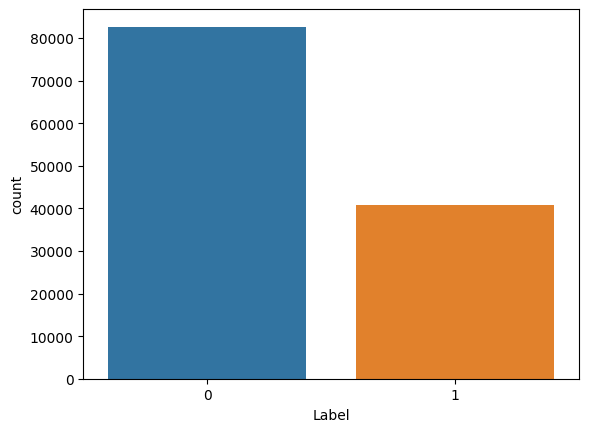

In [44]:
sns.countplot(x = all_combined_data['Label'])

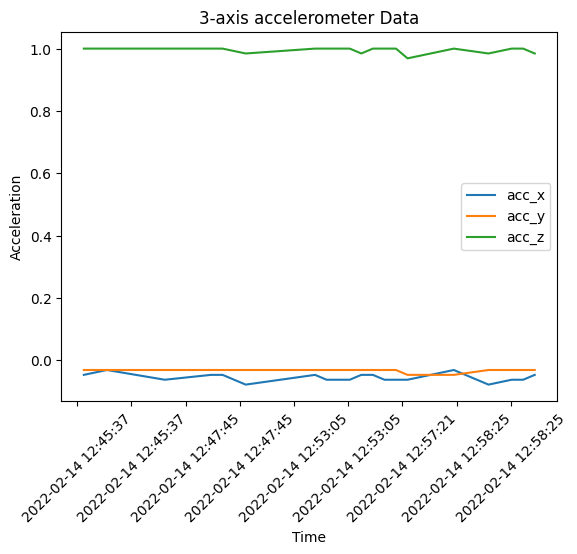

In [45]:
participant = 9
p = all_combined_data[all_combined_data['participant'] == participant]
p = p.dropna()

fig, ax = plt.subplots()
ax.plot(p.index, p['acc_x'], label='acc_x')
ax.plot(p.index, p['acc_y'], label='acc_y')
ax.plot(p.index, p['acc_z'], label='acc_z')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()

ax.set_xticklabels(p.index, rotation=45)
plt.title("3-axis accelerometer Data")

plt.show()

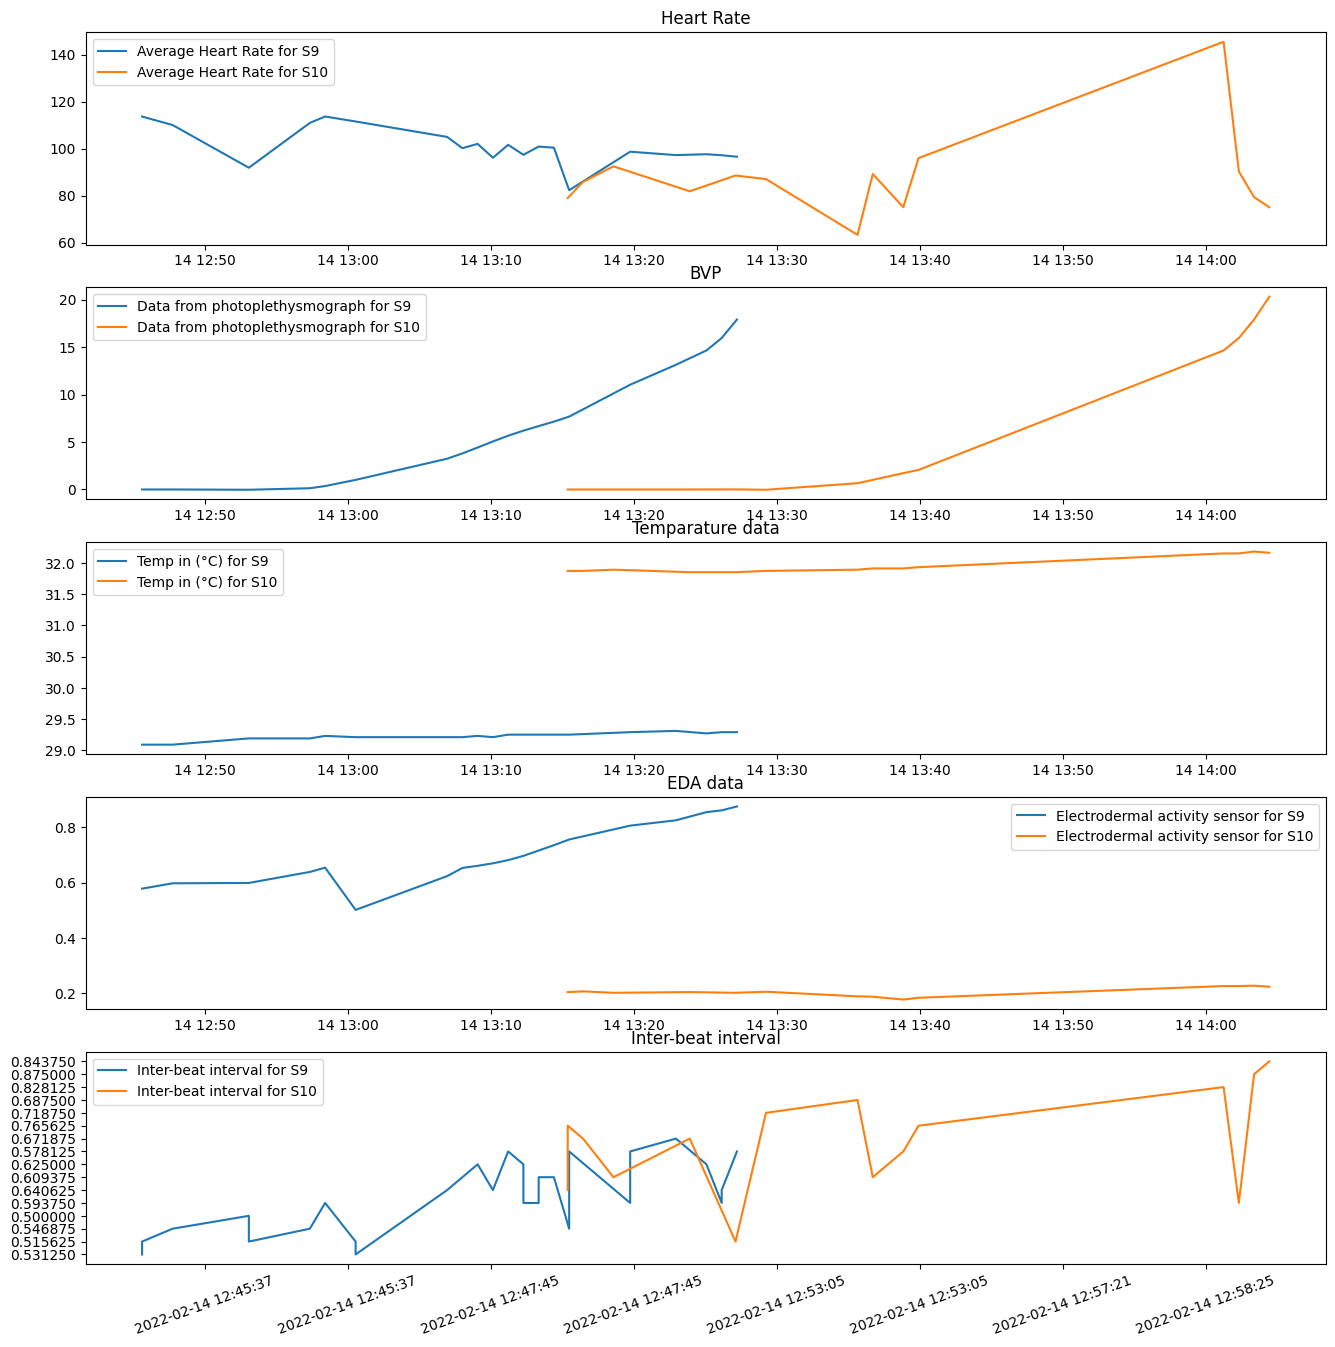

In [46]:
# Change me to get different participant data
participant = 9
parti2 = 10
p = all_combined_data[all_combined_data['participant'] == participant]
p = p.dropna()

p2 = all_combined_data[all_combined_data['participant'] == parti2]
p2 = p2.dropna()

# Create subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(16, 16))

# Plot HR
ax1.plot(p.index, p['hr'],label=f'Average Heart Rate for S{participant}')
ax1.plot(p2.index, p2['hr'],label=f'Average Heart Rate for S{parti2}')
ax1.set_title('Heart Rate')
ax1.legend()

# Plot IBI
ax2.plot(p.index, p['bvp'], label=f'Data from photoplethysmograph for S{participant}')
ax2.plot(p2.index, p2['bvp'], label=f'Data from photoplethysmograph for S{parti2}')
ax2.set_title('BVP')
ax2.legend()

ax3.plot(p.index, p['temp'], label=f'Temp in (°C) for S{participant}')
ax3.plot(p2.index, p2['temp'], label=f'Temp in (°C) for S{parti2}')
ax3.set_title('Temparature data')
ax3.legend()

ax4.plot(p.index, p['eda'], label=f'Electrodermal activity sensor for S{participant}')
ax4.plot(p2.index, p2['eda'], label=f'Electrodermal activity sensor for S{parti2}')
ax4.set_title('EDA data')
ax4.legend()

ax5.plot(p.index, p['ibi'], label=f'Inter-beat interval for S{participant}')
ax5.plot(p2.index, p2['ibi'], label=f'Inter-beat interval for S{parti2}')
ax5.set_title('Inter-beat interval')
ax5.set_xticklabels(p.index, rotation=20)
ax5.legend()

# Show the plots
plt.show()

### Feature Selection

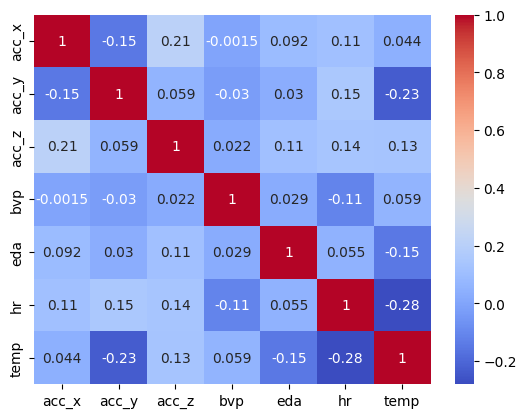

In [47]:
all_combined_data1 = all_combined_data.drop(['participant'], axis=1)
all_combined_data1 = all_combined_data1.drop(['Participant'], axis=1)
all_combined_data1 = all_combined_data1.drop(['Label'], axis=1)
# Get the correlation matrix
corr_matrix = all_combined_data1.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Label', ylabel='count'>

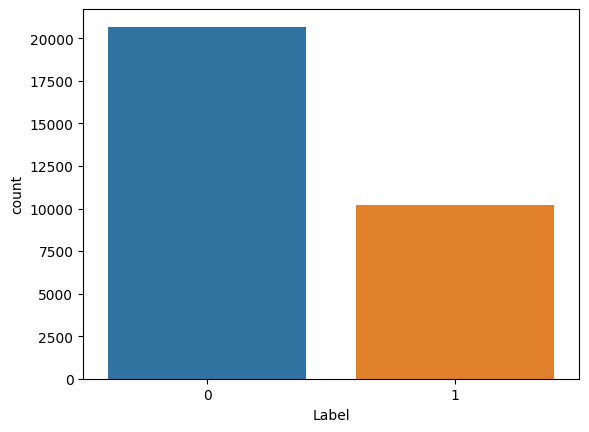

In [48]:
# acc_x	acc_y	acc_z	bvp	eda	hr	ibi	temp	participant	Participant	Label
# FeatureSet 1 - BVP, IDI, HR 
fs1 = all_combined_data[['eda', 'temp', 'Label']]
fs1 = fs1.dropna()
fs1 = fs1.reset_index(drop=True)

fs2 = all_combined_data[['bvp', 'eda','hr', 'Label']]
fs2 = fs2.dropna()
fs2 = fs2.reset_index(drop=True)


sns.countplot(x = fs1['Label'])

0    10342
Name: Label, dtype: int64 1    10237
Name: Label, dtype: int64


<Axes: xlabel='Label', ylabel='count'>

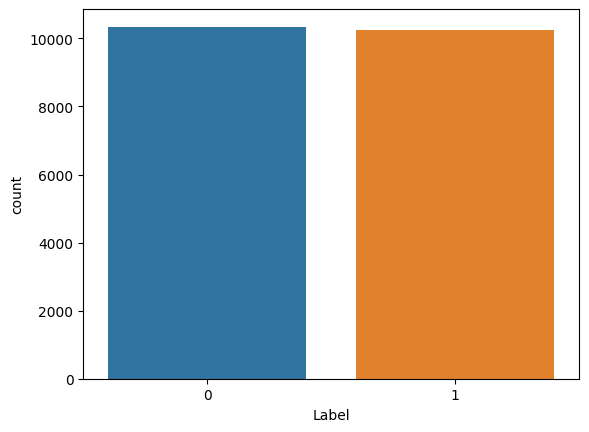

In [49]:


df_inp_A = fs1[fs1['Label'] == 0]
df_inp_B = fs1[fs1['Label'] == 1]

n = df_inp_B['Label'].value_counts()
df_inp_A = df_inp_A.sample(frac = 0.5)
print(df_inp_A['Label'].value_counts(), df_inp_B['Label'].value_counts())
fs1 = pd.concat([df_inp_A, df_inp_B])

sns.countplot(x = fs1['Label'])

## Model Training

#### Logistic Regression

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Handle missing values
data = fs1.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Label', axis=1), data['Label'], test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

# Evaluate the model's performance on the testing set
y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5225947521865889


##### Hyper Tuning

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their potential values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a logistic regression model
model = LogisticRegression()

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their performance on the validation set
print('Best hyperparameters:', grid_search.best_params_)
print('Validation accuracy:', grid_search.best_score_)

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Validation accuracy: 0.5099310219881711


In [52]:
# From hyper params
best_c = 1
best_penalty = 'l2'
best_solver = 'liblinear'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Handle missing values
data = fs1.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Label', axis=1), data['Label'], test_size=0.2, random_state=56)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model_lr = LogisticRegression(C=best_c, penalty=best_penalty, solver=best_solver)
model_lr.fit(X_train, y_train)

# Evaluate the model's performance on the testing set
y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5053449951409135


#### Naive Bayes

              precision    recall  f1-score   support

           0       0.53      0.40      0.46      2110
           1       0.50      0.63      0.56      2006

    accuracy                           0.51      4116
   macro avg       0.52      0.51      0.51      4116
weighted avg       0.52      0.51      0.51      4116

Accuracy: 0.5121477162293488


<Axes: >

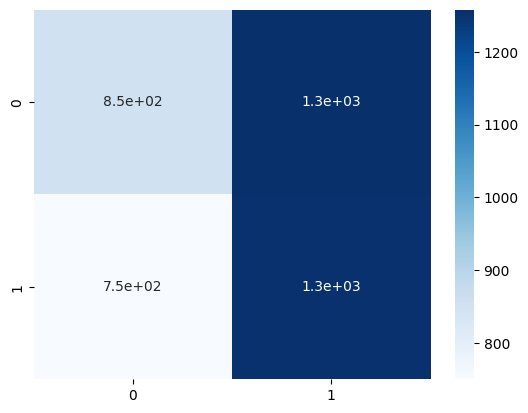

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


data = fs1.dropna()

# Separate features and labels
X = data.drop(columns=['Label'])
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model_nb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues')


#### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = fs1.dropna()

# define X and y
X = data.drop('Label', axis=1)
y = data['Label']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a random forest classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model on the training data
model_rf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model_rf.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8953676708778749


## Model Comparison

#### Accuracy Comparison

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and fit the models
# model_nb = Naive Bayes
# model_lr = Logistic Regression
# model_rf = Random Forest
# X_train and y_train are the training data and labels
# X_test and y_test are the testing data and labels
model_nb.fit(X_train, y_train)
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Predict on the testing data
y_pred_1 = model_nb.predict(X_test)
y_pred_2 = model_lr.predict(X_test)
y_pred_3 = model_rf.predict(X_test)

# Calculate and print accuracy scores
acc_score_1 = accuracy_score(y_test, y_pred_1)
acc_score_2 = accuracy_score(y_test, y_pred_2)
acc_score_3 = accuracy_score(y_test, y_pred_3)
print("Accuracy score of Naive Bayes model: ", acc_score_1)
print("Accuracy score of Logistic Regression model: ", acc_score_2)
print("Accuracy score of Random Forest model: ", acc_score_3)


# plt.figure(figsize=(8,4))
# plt.show()

Accuracy score of Naive Bayes model:  0.5045351473922902
Accuracy score of Logistic Regression model:  0.5163589245221898
Accuracy score of Random Forest model:  0.8953676708778749


#### Accuracy Plot

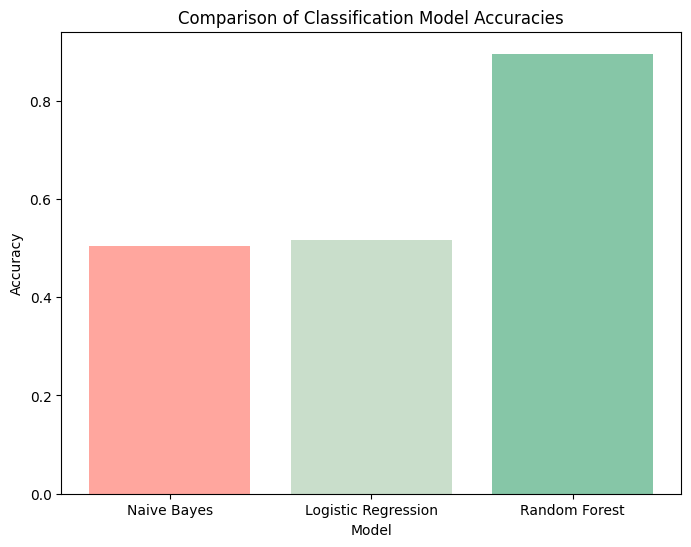

In [56]:
# model_nb = Naive Bayes
# model_lr = Logistic Regression
# model_rf = Random Forest

models = ['Naive Bayes', 'Logistic Regression', 'Random Forest']
accuracies = [acc_score_1, acc_score_2, acc_score_3]

# Define color palette
colors = ['#FFA69E', '#C9DECB', '#86C6A7']

# create the bar plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(models, accuracies, color=colors)

# set chart title and labels
ax.set_title('Comparison of Classification Model Accuracies')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')

# display the plot
plt.show()


#### Confusion Matix Comparison

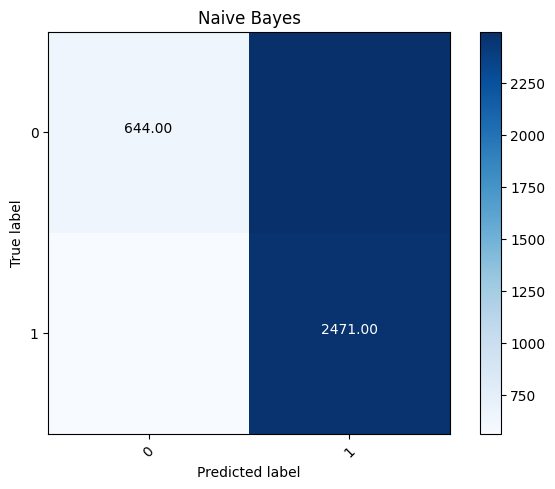

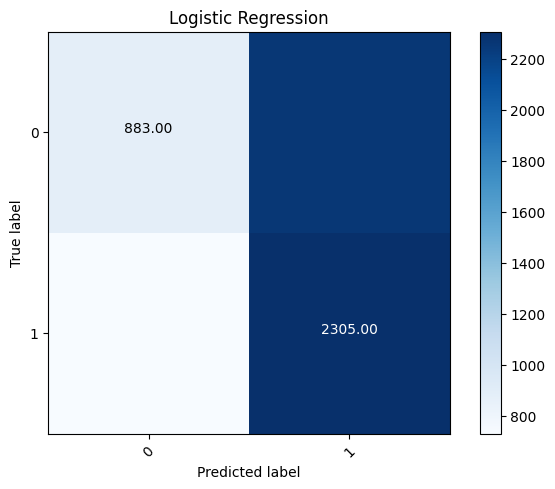

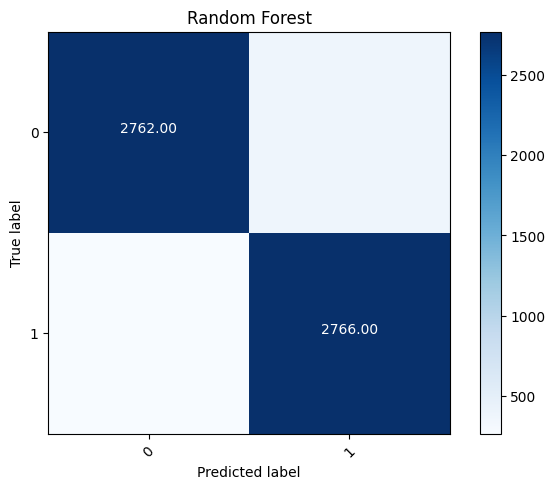

In [57]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in zip(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculate and plot confusion matrices
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_3 = confusion_matrix(y_test, y_pred_3)

plot_confusion_matrix(cm_1, [0,1], 'Naive Bayes')
plt.show()

plot_confusion_matrix(cm_2, [0,1], 'Logistic Regression')
plt.show()

plot_confusion_matrix(cm_3, [0,1], 'Random Forest')
plt.show()


#### Classification Report Comparison

In [58]:

# Calculate and plot confusion matrices
cm_1 = classification_report(y_test, y_pred_1)
cm_2 = classification_report(y_test, y_pred_2)
cm_3 = classification_report(y_test, y_pred_3)

print("Naive Bayes")
print(cm_1)
print('--'*30,'\nLogistic Regression')
print(cm_2)
print('--'*30,'\nRandom Forest')
print(cm_3)


Naive Bayes
              precision    recall  f1-score   support

           0       0.53      0.21      0.30      3139
           1       0.50      0.81      0.62      3035

    accuracy                           0.50      6174
   macro avg       0.52      0.51      0.46      6174
weighted avg       0.52      0.50      0.45      6174

------------------------------------------------------------ 
Logistic Regression
              precision    recall  f1-score   support

           0       0.55      0.28      0.37      3139
           1       0.51      0.76      0.61      3035

    accuracy                           0.52      6174
   macro avg       0.53      0.52      0.49      6174
weighted avg       0.53      0.52      0.49      6174

------------------------------------------------------------ 
Random Forest
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      3139
           1       0.88      0.91      0.90      3035

    accuracy